In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [30]:
train_dir = "archive/casting_data/casting_data/train/"
test_dir = "archive/casting_data/casting_data/test/"


In [31]:
def create_data_generators(train_dir, test_dir, batch_size=32, image_size=(64, 64)): #Augmentation of images 
    datagen = ImageDataGenerator(rescale=1.0/255, 
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True)
    
    train_generator = datagen.flow_from_directory(
        directory=train_dir,
        target_size=image_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="binary",
        shuffle=True)
    
    test_generator = datagen.flow_from_directory(
        directory=test_dir,
        target_size=image_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="binary",
        shuffle=False)
    
    return train_generator, test_generator

train_generator, test_generator = create_data_generators(train_dir, test_dir)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


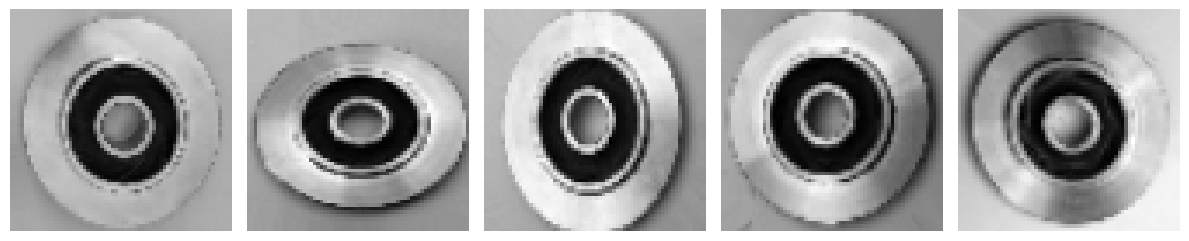

In [34]:
def visualize_samples(generator, num_images=5):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(x_batch[i].reshape(64, 64), cmap="gray")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_samples(train_generator)


In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting by dropping 50% of nodes 

model.add(Dense(1, activation='sigmoid'))  # for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_generator, 
                    validation_data=test_generator, 
                    epochs=10)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.5691 - loss: 0.6719 - val_accuracy: 0.7133 - val_loss: 0.5301
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7963 - loss: 0.4377 - val_accuracy: 0.8531 - val_loss: 0.3134
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8353 - loss: 0.3536 - val_accuracy: 0.8993 - val_loss: 0.2287
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9069 - loss: 0.2295 - val_accuracy: 0.9413 - val_loss: 0.1801
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9268 - loss: 0.1839 - val_accuracy: 0.9580 - val_loss: 0.1308
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9495 - loss: 0.1392 - val_accuracy: 0.9692 - val_loss: 0.0993
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9564 - loss: 0.1229 - val_accuracy: 0.9622 - val_loss: 0.0984
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9604 - loss: 0.1230 - val_accu

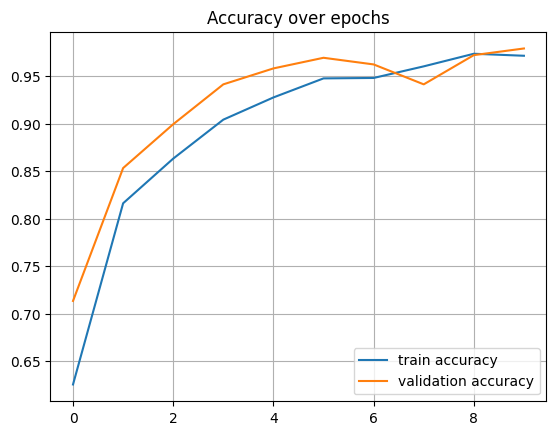

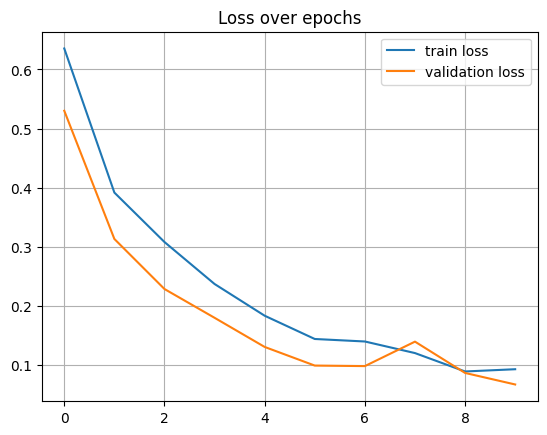

In [17]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss over epochs')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
train_loss, train_accuracy = model.evaluate(train_generator)
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy} Test loss: {test_loss}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9831 - loss: 0.0476
Test accuracy: 0.9762237668037415
